In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [2]:
# Step 1: Data Loading and Preprocessing
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
fractured_images = load_images_from_folder(r"C:\Users\DELL\Downloads\FracAtlas\FracAtlas\images\Fractured")
non_fractured_images = load_images_from_folder(r"C:\Users\DELL\Downloads\FracAtlas\FracAtlas\images\Non_fractured")

In [4]:
# Resize images to a common size (e.g., 64x64) and normalize pixel values
def preprocess_images(images):
    processed_images = []
    for img in images:
        img = cv2.resize(img, (64, 64))
        img = img / 255.0  # Normalize pixel values to range [0, 1]
        processed_images.append(img)
    return np.array(processed_images)

In [5]:
fractured_images = preprocess_images(fractured_images)
non_fractured_images = preprocess_images(non_fractured_images)

In [6]:

# Step 2: Label Creation using dataset.csv
# Load dataset.csv
dataset_csv = r"C:\Users\DELL\Downloads\FracAtlas\FracAtlas\dataset.csv"
data_df = pd.read_csv(dataset_csv)

# Filter images based on fracture status and other attributes
fracture_data = data_df[data_df['fractured'] == 1]
non_fracture_data = data_df[data_df['fractured'] == 0]


In [7]:

# Load and preprocess fractured images
fractured_images = []
for img_name in fracture_data['image_id']:
    img_path = os.path.join(r"C:\Users\DELL\Downloads\FracAtlas\FracAtlas\images\Fractured", img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    fractured_images.append(img)

# Load and preprocess non-fractured images
non_fractured_images = []
for img_name in non_fracture_data['image_id']:
    img_path = os.path.join(r"C:\Users\DELL\Downloads\FracAtlas\FracAtlas\images\Non_fractured", img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0  # Normalize pixel values to range [0, 1]
    non_fractured_images.append(img)

In [8]:
# Combine fractured and non-fractured images and create labels
all_images = np.concatenate((fractured_images, non_fractured_images), axis=0)
all_labels = np.concatenate((np.ones(len(fractured_images)), np.zeros(len(non_fractured_images))), axis=0)

# Step 3: Dataset Splitting
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
# Step 4: Model Architecture

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    flat = layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),  # Reducing neuron count
    layers.Dense(32, activation='relu'),  # Reducing neuron count further
    layers.Dense(1, activation='sigmoid')
])

# Print model summary to check the architecture and output shapes
print(model.summary())                                                                                                          

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 128)        

In [12]:


# Step 5: Model Training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=17, validation_data=(X_val, y_val))



Epoch 1/17


82/82 [==============================] - 19s 176ms/step - loss: 0.4744 - accuracy: 0.8201 - val_loss: 0.4427 - val_accuracy: 0.8379
Epoch 2/17
82/82 [==============================] - 14s 174ms/step - loss: 0.4483 - accuracy: 0.8250 - val_loss: 0.4298 - val_accuracy: 0.8379
Epoch 3/17
82/82 [==============================] - 14s 166ms/step - loss: 0.4393 - accuracy: 0.8277 - val_loss: 0.3866 - val_accuracy: 0.8517
Epoch 4/17
82/82 [==============================] - 13s 164ms/step - loss: 0.4153 - accuracy: 0.8396 - val_loss: 0.3791 - val_accuracy: 0.8578
Epoch 5/17
82/82 [==============================] - 15s 183ms/step - loss: 0.4040 - accuracy: 0.8404 - val_loss: 0.3822 - val_accuracy: 0.8593
Epoch 6/17
82/82 [==============================] - 17s 211ms/step - loss: 0.3881 - accuracy: 0.8503 - val_loss: 0.3550 - val_accuracy: 0.8700
Epoch 7/17
82/82 [==============================] - 16s 191ms/step - loss: 0.3754 - accuracy: 0.8553 - val_loss: 0.3588 - val_accuracy: 0.8

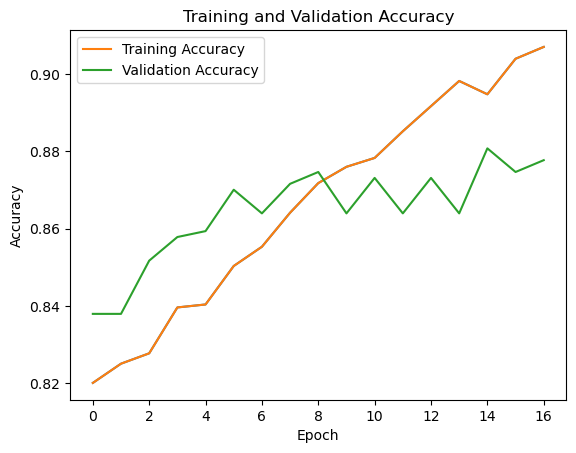

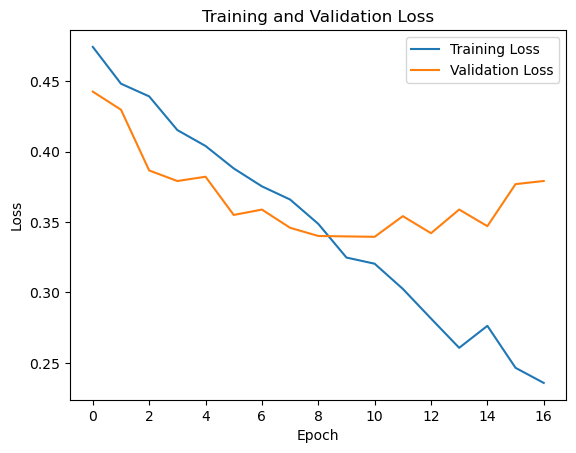

In [13]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.show

# Plot training and validation accuracy
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validatio8777n Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:

import cv2
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))  # Resize image to match model input shape
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Load an example image (replace 'example_image.jpg' with the path to your image)
image_path = r"C:\Users\DELL\Documents\Bones_Dataset\training\fractured\3.jpg"
input_image = preprocess_image(image_path)

# Make predictions using the trained model
predictions = model.predict(input_image)

# Convert predictions to human-readable labels
if predictions[0] > 0.5:
    print("Fracture Detected! Probability:", predictions[0])
else:
    print("No Fracture Detected. Probability:", predictions[0])



1/1 [==============================] - 0s 45ms/step
No Fracture Detected. Probability: [0.32492223]


### SVM

In [44]:


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Extract feature vectors from the CNN model's flattened layer
flatten_layer_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)
X_train_flatten = flatten_layer_model.predict(X_train)
X_val_flatten = flatten_layer_model.predict(X_val)
X_test_flatten = flatten_layer_model.predict(X_test)

# Step 2: Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_flatten, y_train)

# Step 3: Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_flatten, y_train)

# Step 4: Predictions and Evaluation
svm_predictions = svm_classifier.predict(X_test_flatten)
rf_predictions = rf_classifier.predict(X_test_flatten)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


26/26 [==============================] - 1s 36ms/step
SVM Accuracy: 0.8518971848225214
Random Forest Accuracy: 0.8494492044063647
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       663
         1.0       0.65      0.47      0.54       154

    accuracy                           0.85       817
   macro avg       0.77      0.70      0.73       817
weighted avg       0.84      0.85      0.84       817

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       663
         1.0       0.63      0.48      0.55       154

    accuracy                           0.85       817
   macro avg       0.76      0.71      0.73       817
weighted avg       0.84      0.85      0.84       817



In [45]:
model.save("BONE.h5")

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
